# PCA Visualization for entire CA (2010)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#
# All CSVs created from Scala MLib PCA algorithm, CA 
#
m_file_prefixes= ['/var/tmp/ca_2010/total_flow_', '/var/tmp/ca_2010/occupancy_', '/var/tmp/ca_2010/speed_']
# m_file_prefixes= ['/var/tmp/ca_2010/total_flow_']
fid= "CA_2010"

In [4]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')

## NOTE: All visualizations against dataset with no standardization

# Mean Vector

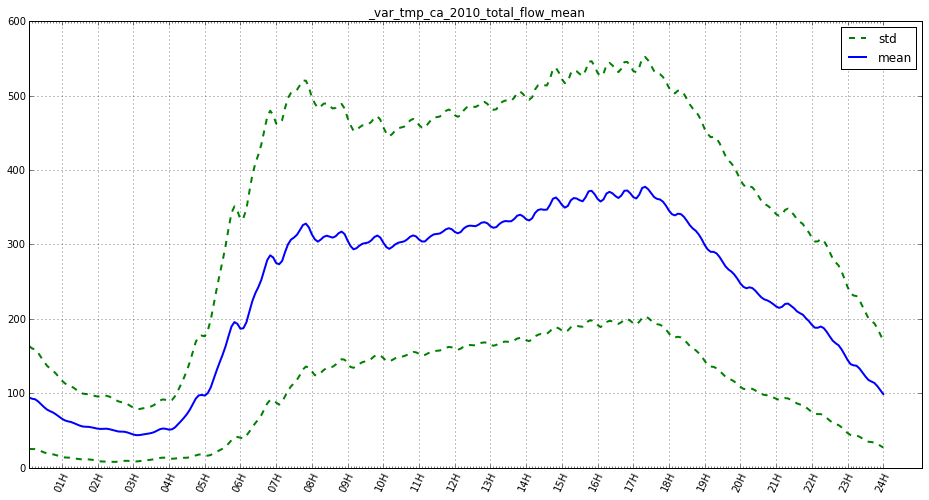

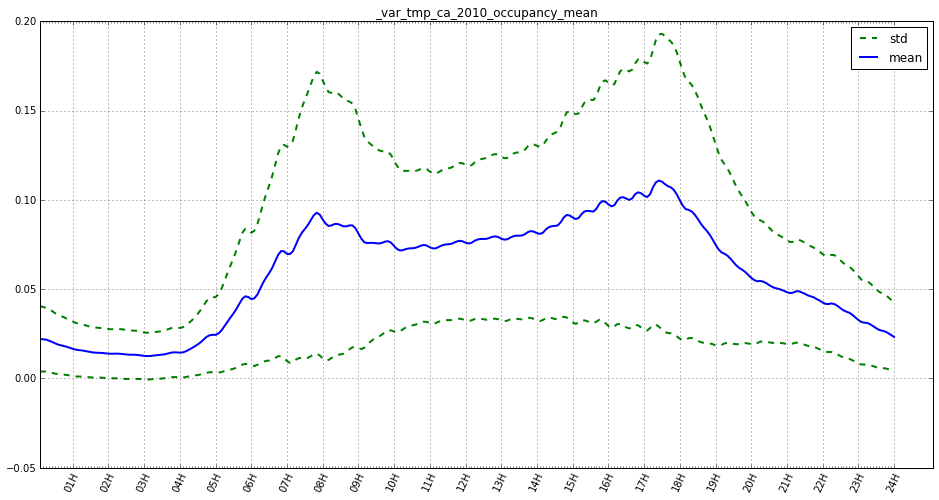

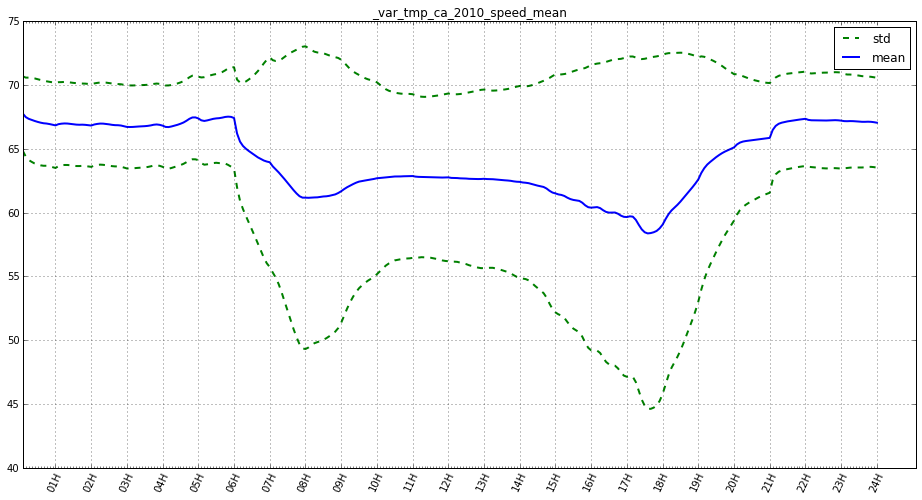

In [13]:
for p in m_file_prefixes:
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'mean_vector.{}.csv'.format(fid)
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    #
    m_filename= p + 'std_vector.{}.csv'.format(fid)
    m_std_vector= pd.read_csv(m_filename, header=None).values[0]
    #
    msub_vec= m_mean_vector - m_std_vector
    madd_vec= m_mean_vector + m_std_vector
    ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
    ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
    ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
    ax.legend()
    #
    m_title= p.replace('/', '_') + 'mean'
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
    #
    m_output_filename= p + 'mean_vector.pdf'
    fig.savefig(m_output_filename)

# Perc. Variance Explained

# Top 10 Eigenvectors

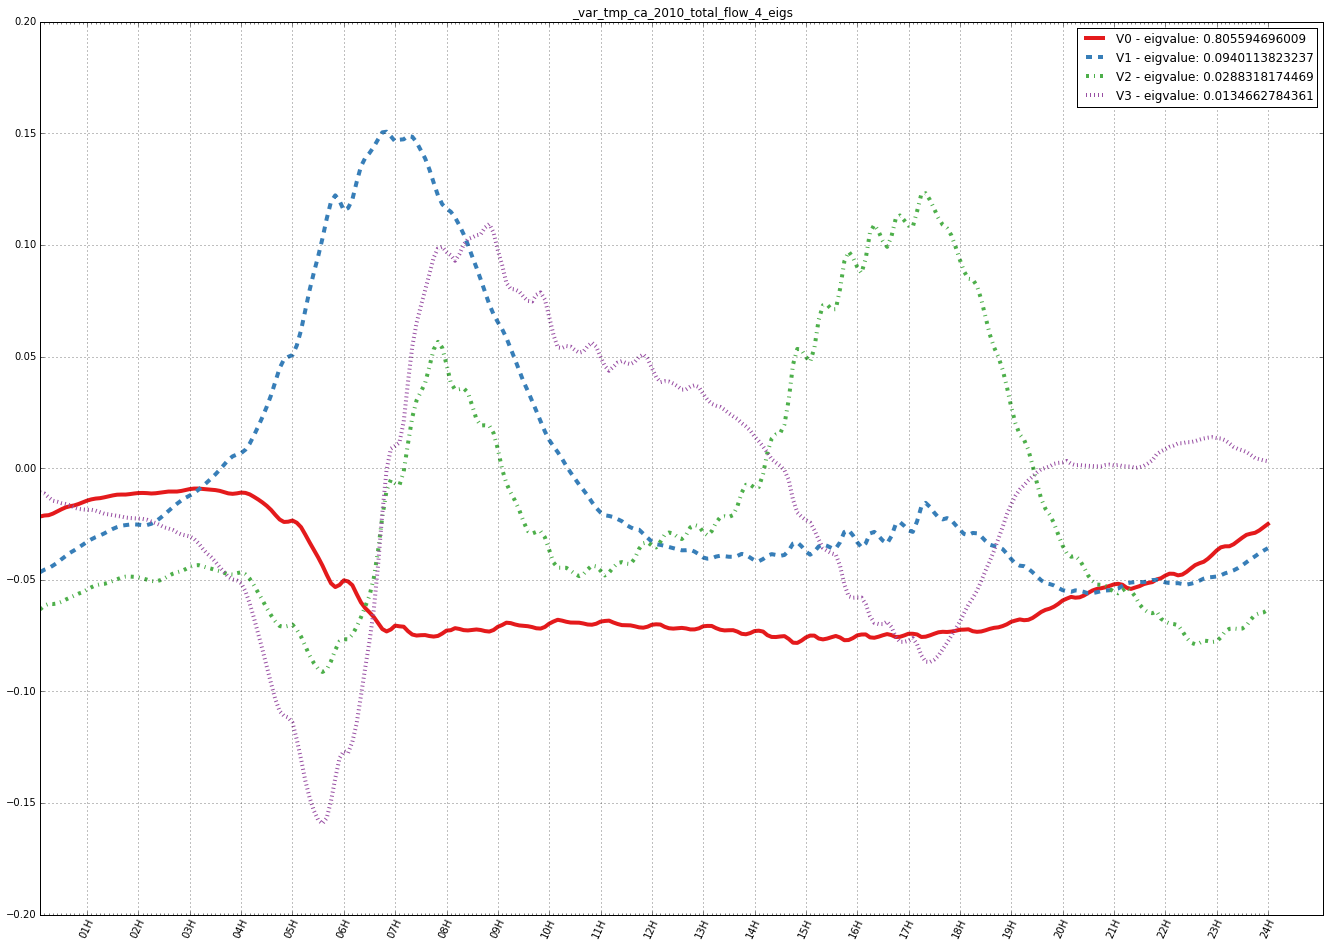

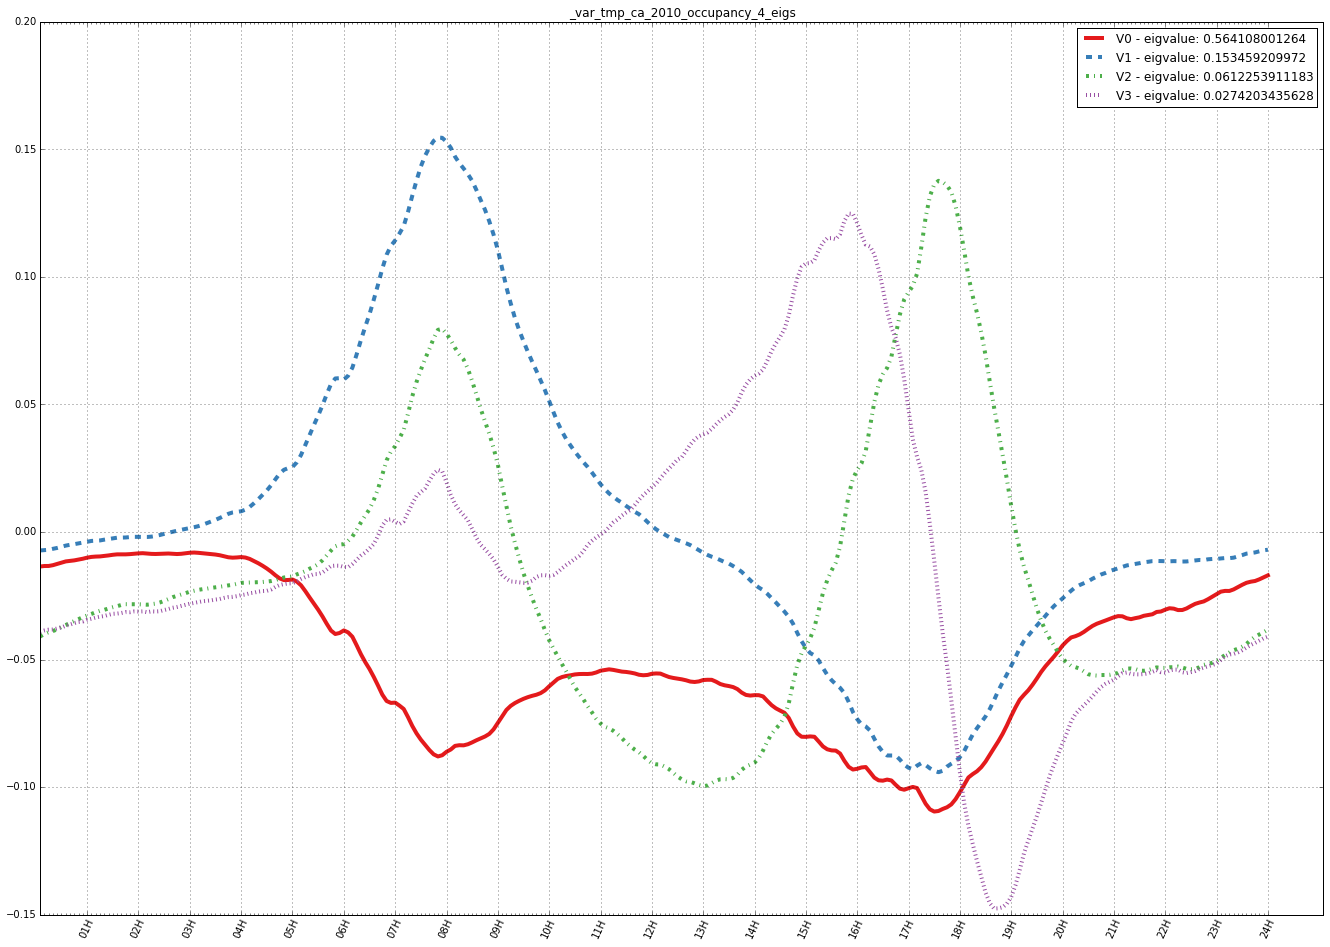

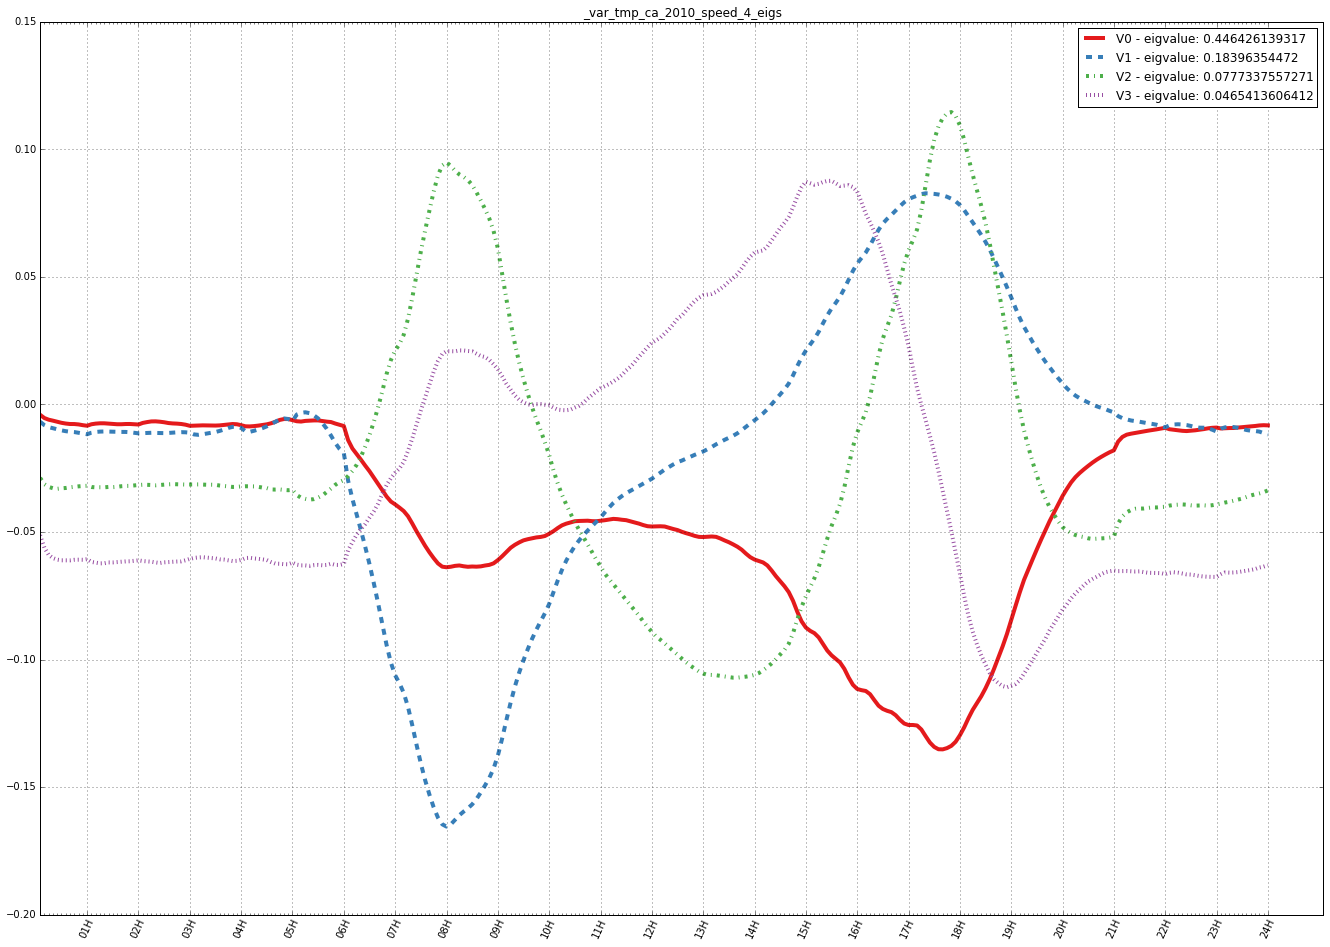

In [15]:
from matplotlib.pyplot import cm

n= 4
linestyles= ['solid', 'dashed', 'dashdot', 'dotted']
for p in m_file_prefixes:
    m_filename= p + 'eigenvectors.{}.csv'.format(fid)
    m_eigs= pd.read_csv(m_filename, header=None).values
    m_eigs_t= m_eigs.T
    #
    m_filename= p + 'eigenvalues.{}.csv'.format(fid)
    m_eig_values= pd.read_csv(m_filename, header=None).values[0]
    #
#     colors=cm.rainbow(np.linspace(0,1,n))
    colors= ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
    width= 23
    height= 16
    fig, ax= plt.subplots(figsize=(width,height))
    l_x= [i for i in xrange(shape(m_eigs_t)[1])]
    for i in xrange(n):
        l_y= m_eigs_t[i]
        m_eig_value= m_eig_values[i]
        m_label= 'V{} - eigvalue: {}'.format(i, m_eig_value)
        ax.plot(l_x, l_y, color=colors[i], linestyle=linestyles[i], lw=4.0, label=m_label)
    ax.legend()
    #
    m_title= p.replace('/', '_') + '{}_eigs'.format(n)
    ax.set_title(m_title)
    #
    set_xaxis(ax, shape(m_eigs_t)[1])
    #
    m_output_filename= p + '10_eigs.pdf'
    fig.savefig(m_output_filename)

In [14]:
filename= '/var/tmp/transform_results/total_flow_transformed.transform.csv'
a_df= pd.read_csv(filename, header=None)
a_df

,0,1,2,3,4,5,6,7,8,9
0,-1589.781630,201.676127,-102.731830,-33.227800,-27.664822,79.989261,-47.837841,35.599614,93.378925,41.953432
1,-1495.228160,56.202275,-81.983984,-319.859177,-387.993688,-113.314072,-126.005146,-160.995419,16.396999,63.098118
2,-2050.704991,378.724632,541.371774,186.908434,8.122058,-45.045016,110.188189,-20.442932,54.565670,10.483712
3,-886.996458,-589.114647,-402.717236,323.629403,261.093788,-236.073009,65.352765,66.702066,-32.154116,-116.426099
4,-1340.738441,1204.711692,-296.326816,-84.898957,116.810028,245.437682,8.205217,105.606170,128.520906,-29.732293
5,-971.131489,-220.104163,726.782967,-677.200591,-13.654497,-142.668745,158.470067,159.868764,-16.105978,167.590946
6,2920.064759,-306.112935,-18.590866,-12.292608,126.620359,103.852525,-29.711996,-9.838240,25.050259,-3.033709
7,581.264956,-1055.067508,28.750378,-66.769277,-160.234953,-34.112428,-193.611979,156.785387,-145.108039,-200.319057
8,-2067.612386,349.656766,386.565873,162.214397,-55.564671,17.384142,141.908764,119.863003,-9.206521,39.137649
9,-3731.434269,-304.183940,-104.809485,119.606509,-40.495510,205.908990,-186.970090,-205.479956,20.553927,187.385358


In [ ]:
a_df

# Reconstruction on Top Eigenvectors

In [ ]:
def get_reconstruction(eigenvectors, Mean, x, k):
    # Compute the projection of the data on the top k eigen-vectors
    U = eigenvectors[:k]
    #
    Eig = np.matrix(U.T)
    matrix = np.matrix(x) - Mean
    matrix[np.isnan(matrix)] = 0
    m_projection = matrix * Eig;
    #
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    rec = np.ravel(rec)
    return (x, rec)

In [ ]:
ks = [2, 4, 6, 8, 10]
rows= 5
columns= len(ks)

for p in m_file_prefixes:
    m_filename= p + 'eigenvectors.{}.csv'.format(fid)
    m_eigs= pd.read_csv(m_filename, header=None).values
    m_eigs_t= m_eigs.T
    
    m_filename= p + 'mean_vector.{}.csv'.format(fid)
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    
    m_filename= p + 'samples.{}.csv'.format(fid)
    m_samples= pd.read_csv(m_filename, header=None).values
    
    fig, axes = plt.subplots(nrows=rows, ncols=columns, sharex=True, sharey=True, figsize=(42, 35))
    plt.tight_layout()
    for row in xrange(rows):
        x = m_samples[row]
        for col in xrange(columns):
            k= ks[col]
            m_rec_struct = get_reconstruction(m_eigs_t, m_mean_vector, x, k)
            m_orig_x = m_rec_struct[0]
            m_rec = m_rec_struct[1]

            ax = axes[row, col]
            ax.plot(m_orig_x, c='g', label='orig')
            ax.plot(m_rec, c='b', label='recon')
            ax.set_xlim([0, len(m_orig_x)])
            ax.set_title("{} eigs, sample {}".format(k, row))
            ax.legend()
            #
            set_xaxis(ax, shape(m_eigs_t)[1])
            #
            if row == (rows - 1):
                ax.set_xlabel("time")
    m_output_filename= p + 'reconstruction.pdf'
    fig.savefig(m_output_filename)